## Training 

In [453]:
import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import pickle
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
#Loading data and embeddings
label_embeddings = pickle.load(open("Data/Embeddings/CIFAR/CIFAR_100_label_to_embedding_google_news.pk", "rb"))
train_x = np.load("vgg_16/train_x.npy").reshape((50000,8192))
train_y = np.load("vgg_16/train_y.npy")
test_x = np.load("vgg_16/test_x.npy").reshape((10000,8192))
test_y = np.load("vgg_16/test_y.npy")


(10000, 1)


In [184]:
#Convert train/test labels to embeddings
train_y_embeddings = np.zeros((50000, 300))
test_y_embeddings = np.zeros((10000, 300))

for i in range(train_y.shape[0]):
    train_y_embeddings[i] = label_embeddings[int(train_y[i][0])]

for i in range(test_y.shape[0]):
    test_y_embeddings[i] = label_embeddings[int(test_y[i][0])]

In [275]:
model = Sequential()
model.add(Dense(300, input_dim=8192, activation='relu'))
model.add(Dense(300, input_dim=300, activation='relu'))
#model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dense(300, input_dim=300, activation='tanh'))

In [276]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [277]:
model.fit(train_x, train_y_embeddings, epochs=3, batch_size=64)

Epoch 1/3
50000/50000 [==============================] - 50s 998us/step - loss: 0.0281 - acc: 0.0900
Epoch 2/3
50000/50000 [==============================] - 51s 1ms/step - loss: 0.0257 - acc: 0.1364
Epoch 3/3
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0251 - acc: 0.1526


In [304]:
model.fit(train_x, train_y_embeddings, epochs=1, batch_size=64)

Epoch 1/1
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0239 - acc: 0.1825


## Testing

In [344]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [345]:
pred_test_y = model.predict(test_x)

label_embeddings
label_embeddings_arr = np.zeros((100, 300))
for i in range(100):
    label_embeddings_arr[i] = label_embeddings[i]

In [470]:
#Top K Predictions
def pred_top_k(k=5, pred_test_y=pred_test_y, label_embeddings_arr=label_embeddings_arr):
    sim_table = cosine_similarity(pred_test_y, label_embeddings_arr)
    top_k_guesses = np.argpartition(sim_table,range(99-k+1,100),axis=1)[:,99-k+1:]
    return top_k_guesses


#Top prediction
label_predictions = sim_table.argmax(axis=1)
label_predictions

pred_top_k(5)


array([[83, 92, 53, 57,  0],
       [40, 10, 16,  9, 28],
       [79, 81, 66,  7, 44],
       ..., 
       [93, 79, 81, 66, 44],
       [79, 93, 81, 44, 66],
       [12,  8, 13, 90, 82]])

In [431]:
#Accuracy
acc = np.sum((np.squeeze(test_y) == label_predictions)) / float(test_y.shape[0])
print("Accuracy: " + str(acc))

#Top k Accuracy

def acc(top_k=top_k_guesses, test_y=test_y):
    correct = 0
    for i in range(test_y.shape[0]):
        if np.squeeze(test_y)[i] in top_k[i]:
            correct += 1
    return correct/float(test_y.shape[0])

print("Top " + str(k) + " Accuracy: " + str(acc()))

Accuracy: 0.1965
Top 5 Accuracy: 0.3498


In [471]:
x = ny = np.zeros(100)

p.linspace(0,99,100)
for i in range(100):
    k = i+1
    top_k_guesses = pred_top_k(k)
    y[i] = acc(top_k_guesses, test_y)

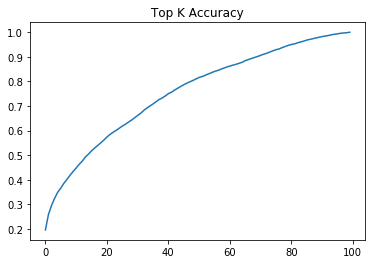

In [475]:
plt.plot(x,y)
plt.title("Top K Accuracy")